In [32]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
from path import Path
from tqdm import tqdm

In [33]:
OG_PATH = '/mnt/d/projects/COVID-datasets/Cambridge_Task1'
WAV_FOLDER = OG_PATH + '/0426_EN_used_task1'
METADATA_FOLDER = OG_PATH + '/data_0426_en_task1.csv'

In [34]:
df_og = pd.read_csv(os.path.join(METADATA_FOLDER), sep=';')

In [35]:
df_og

,Uid,Age,Sex,Medhistory,Smoking,Language,Date,Folder Name,Symptoms,Covid-Tested,Hospitalized,Location,Voice filename,Cough filename,Breath filename,split,label
0,02zsN3RSwW8M,20-29,Female,None,1to10,en,02-11-2020 21:04:12,2020-11-02-21_04_13_798454,None,negativeOver14,no,-,audio_file_read.wav,audio_file_cough.wav,audio_file_breathe.wav,2,0
1,02zsN3RSwW8M,20-29,Female,None,1to10,en,04-11-2020 21:09:52,2020-11-04-21_09_53_465125,None,neverThinkHadCOVIDNever,no,-,audio_file_read.wav,audio_file_cough.wav,audio_file_breathe.wav,2,0
2,047p0mcroGXL,50-59,Female,None,never,en,08-04-2021 13:00:04,2021-04-08-13_00_13_542260,None,neverThinkHadCOVIDNever,no,-,audio_file_read.wav,audio_file_cough.wav,audio_file_breathe.wav,2,0
3,04sAWoLBAsZj,20-29,Female,None,never,en,01-02-2021 06:39:48,2021-02-01-06_39_51_693778,None,negativeNever,no,-,audio_file_read.wav,audio_file_cough.wav,audio_file_breathe.wav,0,0
4,061JIoYFqGyr,50-59,Female,None,ex,en,03-11-2020 21:57:34,2020-11-03-21_57_36_164631,None,neverThinkHadCOVIDNever,no,-,audio_file_read.wav,audio_file_cough.wav,audio_file_breathe.wav,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9451,ZZOVYSBZRT,20-29,Female,None,never,en,15-12-2020 13:01:30,2020-12-15-13_01_34_096384,"drycough,wetcough,shortbreath,tightness,headac...",neverThinkHadCOVIDNever,no,-,voice_ZZOVYSBZRT_1608037290680.wav,cough_ZZOVYSBZRT_1608037290670.wav,breaths_ZZOVYSBZRT_1608037290644.wav,0,1
9452,2020-11-13-17_08_23_362377,20-29,Male,None,ex,en,form-app-users,2020-11-13-17_08_23_362377,"fever,drycough,wetcough,tightness,smelltasteloss",last14,no,-,audio_file_read.wav,audio_file_cough.wav,audio_file_breathe.wav,0,1
9453,2020-11-16-06_11_16_109602,20-29,Male,None,ecig,en,form-app-users,2020-11-16-06_11_16_109602,"drycough,shortbreath,sorethroat",over14,no,-,audio_file_read.wav,audio_file_cough.wav,audio_file_breathe.wav,0,1
9454,2020-11-22-11_06_00_777194,30-39,Female,asthma,ex,en,form-app-users,2020-11-22-11_06_00_777194,"drycough,shortbreath,tightness,headache,muscle...",last14,no,-,audio_file_read.wav,audio_file_cough.wav,audio_file_breathe.wav,2,1


In [37]:
# Add full path to the audios as we will need it later
df_og['voice-path'] = None
df_og.loc[(df_og['Date'] != 'form-app-users'),'voice-path'] = WAV_FOLDER + '/' + df_og['Uid']+'/'+df_og['Folder Name']+'/'+df_og['Voice filename']
df_og.loc[(df_og['Date'] == 'form-app-users'),'voice-path'] = WAV_FOLDER+ '/' + df_og['Date']+'/'+df_og['Folder Name']+'/'+df_og['Voice filename']

In [38]:
# Summary
df_og['label'].value_counts()

0    4847
1    4609
Name: label, dtype: int64

In [39]:
WAV_FOLDER_TASK1 = os.path.join(OG_PATH, 'TASK1-VOICE')

In [18]:
# create a new folder to store the EN wav files
os.mkdir(WAV_FOLDER_TASK1)

# start copying...
# wav files in the new folder are named as "00001.wav", "00002.wav", ...
df_og['voice-path-new'] = None
for idx , row in tqdm(df_og.iterrows()):
    src = row['voice-path']
    dst = os.path.join(WAV_FOLDER_TASK1, f'{idx:05}.wav')
    shutil.copyfile(src, dst)
    df_og.loc[idx,'voice-path-new'] = dst

9456it [12:52, 12.24it/s]


In [19]:
for idx , row in tqdm(df_og.iterrows()):
    df_og.loc[idx,'voice-path-new'] = os.path.join('./data_og/Cambridge/wav/TASK1-VOICE', os.path.basename(df_og.loc[idx,'voice-path-new']))

9456it [00:01, 6178.11it/s]


In [48]:
local_data_path = '/home/yizhu/projects/transfer-learning-diagnostics/data_og/Cambridge/metadata/'
df_og.to_csv(os.path.join(local_data_path,'TASK1-metadata.csv'),index=False,header=True,sep=';')

In [58]:
toy = torch.tensor(df['label'][0]).view(1,-1)[0].type(torch.LongTensor)

In [59]:
toy

tensor([0])

Now simply do ```! zip -r TASK1-VOICE.zip TASK1-VOICE/*.wav``` to create a zip file of the EN folder, then move it to ```./data_og/Cambridge/wav``` folder. Our pipeline will automatically unzip the file and prepare it for subsequent training.

In [27]:
import torchaudio
import torch
import matplotlib.pyplot as plt
import torchaudio.functional as F

In [30]:
toy,sr = torchaudio.load(WAV_FOLDER_TASK1+'/00003.wav',normalize=True)
signal = torch.mean(toy,axis=0)
signal = F.resample(signal,sr,new_freq=16000,
                    lowpass_filter_width=64,
                    rolloff=0.9475937167399596,
                    beta=14.769656459379492
                    )
signal = signal / torch.max(torch.abs(signal))

In [24]:
sr

44100

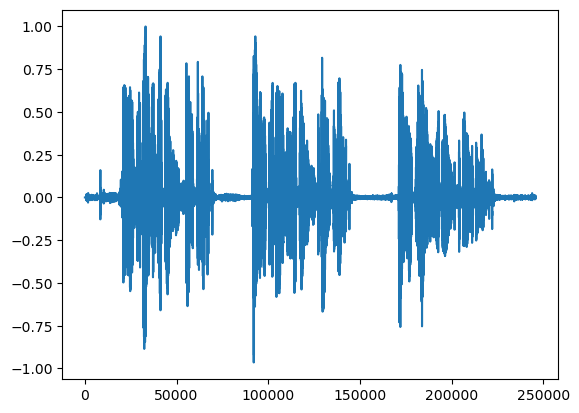

In [31]:
plt.plot(range(len(signal)),signal.numpy())